In [2]:
import pandas as pd
import datetime as dt
from google.colab import drive
from google.colab import files
import seaborn as sb
!pip install xlrd
import xlrd
import functools
import matplotlib.pyplot as plt
sb.set_style("darkgrid")
import sklearn
from scipy import stats
import numpy as np

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
### DATA PROCESSING  
path = '/content/gdrive/My Drive/Python Final Project/Datasets/'
county_dens = pd.read_csv(path + 'PCounty_Dens.txt',sep='\t')
crime = pd.read_csv(path +'PCrime_Original.txt',sep='\t')
crime.timedate = pd.to_datetime(crime.timedate)
crime['Year'] = [x.year for x in crime.timedate]
crime['Month'] = [x.month for x in crime.timedate]

## LANDUSE 
landuse = pd.read_csv(path + 'LanduseFiltered.txt',sep='\t')
landuse['block'] = landuse['block'].fillna(0)
landuse['block'] = landuse['block'].astype(int)
landuse = landuse.drop_duplicates('block')
## Demographic
dem = pd.read_csv(path + 'demographicDataFull.csv')
## MERGE TABLES 
crimeDem = crime.merge(dem,left_on='censustract',right_on='tract',how='inner')
TotalDF = crimeDem.merge(landuse, on='block',how='inner')
TotalDF['YearTract'] = [str(x) + '_' + str(y) for x,y in zip(TotalDF.Year,TotalDF.tract)]

## Create More columns and index by primary key
def parseAgg(obj,series):
  selectEl = series[series ==obj]
  return len(selectEl)


### Add columns for use_simple 
useSimpleNames = set(TotalDF.use_simple)
solDem = TotalDF.drop_duplicates('block')
collection = pd.DataFrame(solDem.groupby('tract').date.count())
for name in useSimpleNames:
  parseData = solDem.groupby('tract').agg({'use_simple': [functools.partial(parseAgg,name)]})
  collection = pd.concat([collection,parseData],axis = 1)

collection.columns = collection.columns = ['Total'] + list(useSimpleNames)
## Filtering out crime type but welcome to use if you want
colFilter = ['date','time','ucr','crime_cat','long','lat', \
                           'crimetype','timedate','weekday','block','BLOCK'\
                           ,'blockgroup','censustract','Unnamed: 0','state_x','county_x',\
             'BLOCK','BLKGRP','TRACT','state_y','county_y','use_detail','use_color','use_simple']

nanFilter = TotalDF[np.isfinite(TotalDF['Income'])]
nanFilter.shape
dfAgg = nanFilter.drop(colFilter,axis=1)
dfAgg = nanFilter.drop_duplicates(['Year','Month','tract'])

YMTractDF = dfAgg.merge(collection.reset_index(),on='tract')
Yvar = TotalDF.groupby(['Year','Month','tract']).count().reset_index()[['Year','Month','tract','date']]
Yvar.columns = ['Year','Month','tract','Y']
YMTractDF = YMTractDF.merge(Yvar,on=['Year','Month','tract'])
YMTractDF = YMTractDF.drop(colFilter,axis=1)

In [0]:
YMTractDF.columns

Index(['Year', 'Month', 'Income', 'total_x', 'count_5', 'count_1', 'count_125',
       'count_15', 'count_185', 'count_2', 'count_inf', 'E', 'tract',
       'total_y', 'white', 'black', 'us_indian', 'asian', 'pacific', 'other',
       'two_or_more', 'hispanic', 'area', 'year', 'YearTract', 'Total',
       'commercial', 'vacant_other', 'water', 'residential', 'industrial',
       'civic_institution', 'park_openspace', 'culture_recreation', 'Y'],
      dtype='object')

In [0]:
YMTractDF.to_csv(path + 'YearMonthTractData.csv')

In [1]:
set(YMTractDF.Year)

NameError: ignored

In [164]:
YMTractDF.head()


,Year,Month,Income,total_x,count_5,count_1,count_125,count_15,count_185,count_2,...,Total,commercial,vacant_other,water,residential,industrial,civic_institution,park_openspace,culture_recreation,Y
0,2006,1,59365.0,2533,269,232,27,92,53,18,...,26,4,0,0,18,0,3,0,1,28
1,2006,3,59365.0,2533,269,232,27,92,53,18,...,26,4,0,0,18,0,3,0,1,31
2,2006,4,59365.0,2533,269,232,27,92,53,18,...,26,4,0,0,18,0,3,0,1,15
3,2006,5,59365.0,2533,269,232,27,92,53,18,...,26,4,0,0,18,0,3,0,1,27
4,2006,6,59365.0,2533,269,232,27,92,53,18,...,26,4,0,0,18,0,3,0,1,30


(1932921, 48)

**Next Steps Notes:**


1.   Split data into training and test by tracts (I made the primary key year tract so you have some flexibility with this)
2.   Predictive variable is called "Y" it is the number of crimes per year per tract.
3.   Start with any type of regression model and then go from there make sure to keep track of the out of sample errors.

**If time**


*   Filter by different crime type 
*   Filter by different years or try to predict the subsequent years
*   Experiment with online learning 







In [0]:
## read in excel
path = '/content/gdrive/My Drive/Python Final Project/Datasets/'
YMTractDF = pd.read_csv(path + 'YearMonthTractData.csv')

In [0]:
demographic = YMTractDF.drop_duplicates('tract')

In [0]:
demFilter = demographic.drop(['Unnamed: 0','Year','Month','tract','YearTract','Y'],axis=1)

In [0]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
scaler = StandardScaler()

In [26]:
demScale = scaler.fit_transform(demFilter)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
def KMeansTest(data):
    res = []
    for i in range(1,11):
        km = KMeans(i,'random', max_iter=300, random_state=0, n_init=30)
        km_fit = km.fit(data)
        res.append(km_fit.inertia_)
    return res

In [0]:
distortion = KMeansTest(demScale)

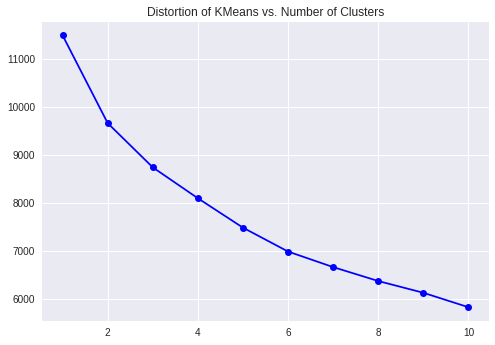

In [33]:
plt.plot(range(1,11),distortion, c='blue', marker='o')
plt.title('Distortion of KMeans vs. Number of Clusters')
plt.show()


In [0]:
km = KMeans(4,'random', max_iter=300, random_state=0, n_init=30)

In [0]:
km_fit = km.fit(demScale)

In [0]:
class_pred_label = km_fit.labels_

In [0]:
kMeanLabelDF = pd.DataFrame({'classLabel':class_pred_label, 'tract': demographic.tract})

In [0]:
kMeanLabelDF.to_csv(path + 'KMeanLabelDF.csv')